In [2]:
from nwb_utils import NWBUtils

# Example ephys session
ephys_path = "/root/capsule/data/" \
             "ecephys_776293_2025-02-14_15-19-17_sorted_2025-02-28_21-37-07/" \
             "nwb/" \
             "ecephys_776293_2025-02-14_15-19-17_experiment1_recording1.nwb"

# Example behavior/ophys session
ophys_path = "/root/capsule/data/" \
             "behavior_777403_2025-04-11_16-53-47_processed_2025-04-12_04-37-54/" \
             "nwb/" \
             "behavior_777403_2025-04-11_16-53-47.nwb"

# Read ephys
ephys_data = NWBUtils.read_ephys_nwb(nwb_full_path=ephys_path)
# ephys_data will be None on failure, or the NWBFile-like object on success.

# Read ophys/behavior
ophys_data = NWBUtils.read_ophys_nwb(nwb_full_path=ophys_path)
# ophys_data will likewise be None on failure, or the NWBFile-like object on success.


Successfully read ephys NWB from: /root/capsule/data/ecephys_776293_2025-02-14_15-19-17_sorted_2025-02-28_21-37-07/nwb/ecephys_776293_2025-02-14_15-19-17_experiment1_recording1.nwb


KeyboardInterrupt: 

In [ ]:
from nwb_utils import NWBUtils

ephys_data = NWBUtils.read_ephys_nwb(
    session_name="776293_2025-02-14_15-19-17"
)

ophys_data = NWBUtils.read_ophys_nwb(
    session_name="777403_2025-04-11_16-53-47"
)


In [ ]:
from general_utils import find_ephys_sessions, find_behavior_sessions
from nwb_utils import NWBUtils

def main():
    data_root = '/root/capsule/data/'

    # 1. Find all ephys sessions
    all_ephys, ephys_by_animal, spike_sorted = find_ephys_sessions(data_root)
    print("All ephys sessions:", all_ephys)
    print("Spike-sorted sessions:", spike_sorted)

    # 2. Find all behavior sessions
    all_behav, behav_by_animal, processed_behav = find_behavior_sessions(data_root)
    print("All behavior sessions:", all_behav)
    print("Processed behavior sessions:", processed_behav)

    # 3. Read the first spike-sorted ephys session
    if spike_sorted:
        first_ephys = spike_sorted[0]
        print(f"\nLoading ephys session: {first_ephys}")
        ephys_data = NWBUtils.read_ephys_nwb(
            session_name=first_ephys,
            folder_path=data_root
        )
        # ephys_data is None on failure, or the NWBFile-like object on success

    # 4. Read the first processed behavior session
    if processed_behav:
        first_behav = processed_behav[0]
        print(f"\nLoading behavior session: {first_behav}")
        behav_data = NWBUtils.read_ophys_nwb(
            session_name=first_behav,
            folder_path=data_root
        )
        # behav_data is None on failure, or the NWBFile-like object on success

if __name__ == "__main__":
    main()


In [ ]:
from behavior_utils import extract_event_timestamps
from nwb_utils import NWBUtils
behav_data = NWBUtils.read_ophys_nwb(session_name='behavior_762206_2025-01-17_16-20-02_processed_2025-01-18_07-17-12')
behav_data = NWBUtils.read_behavior_nwb(session_name='ecephys_753125_2024-10-14_15-37-15_sorted_2024-11-09_20-07-38')
extract_event_timestamps(behav_data,'left_lick')

['QLearning_L1F1_CK1_softmax', 'QLearning_L1F0_epsi', 'QLearning_L2F1_softmax', 'WSLS', 'QLearning_L2F1_CK1_softmax']
Found ephys NWB: /root/capsule/data/ecephys_764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33/nwb/ecephys_764790_2024-12-19_16-11-34_experiment1_recording1.nwb
Successfully read ephys NWB from: /root/capsule/data/ecephys_764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33/nwb/ecephys_764790_2024-12-19_16-11-34_experiment1_recording1.nwb
Found behavior NWB: /root/capsule/data/behavior_nwb/764790_2024-12-19_16-11-34.nwb
Successfully read behavior NWB from: /root/capsule/data/behavior_nwb/764790_2024-12-19_16-11-34.nwb
Successfully appended units table to behavior NWB.


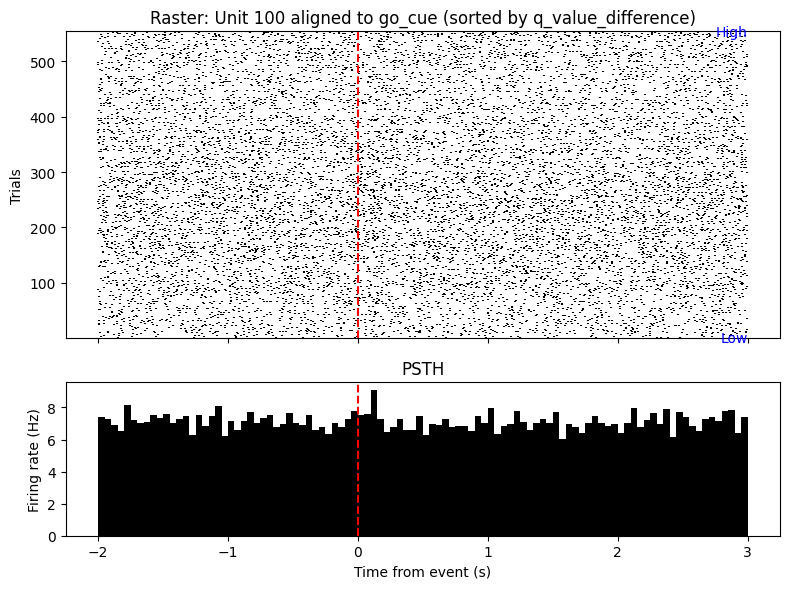

Figure saved as /root/capsule/results/764790_2024-12-19_16-11-34_unit_100.pdf


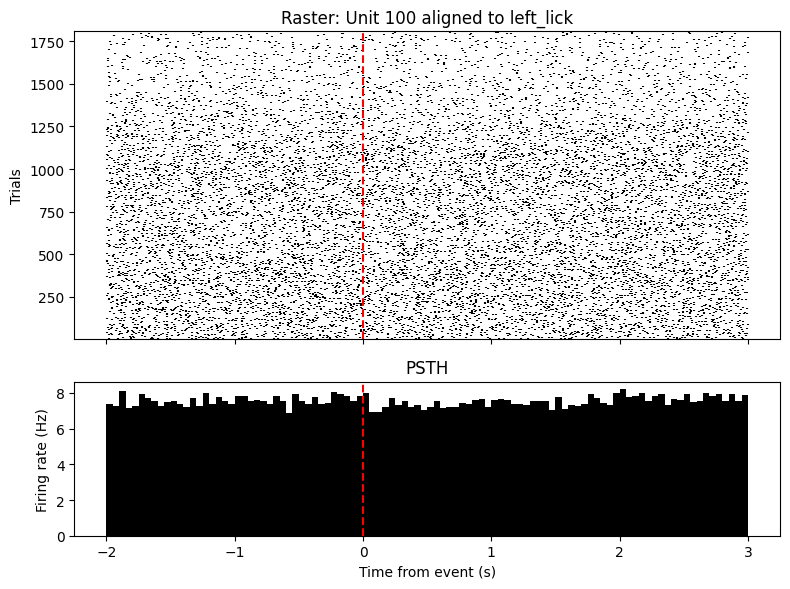

In [ ]:
from ephys_behavior_visualization import plot_raster_graph
from nwb_utils import NWBUtils
from behavior_utils import extract_fitted_data, find_trials,get_fitted_model_names


session_name='ecephys_776293_2025-02-18_12-51-36_sorted_2025-03-30_05-50-33'
session_name='764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33'
#session_name='764790_2024-12-19_16-11-34'
print(get_fitted_model_names(session_name=session_name))

nwb_data,tag=NWBUtils.combine_nwb(session_name=session_name)
fitted_data=extract_fitted_data(nwb_behavior_data=nwb_data,session_name=session_name,model_alias='QLearning_L1F1_CK1_softmax',latent_name='q_value_difference')
exclude_trials=find_trials(nwb_behavior_data=nwb_data,trial_type='no_response')

plot_raster_graph(nwb_data=nwb_data,unit_index=100,fitted_data=fitted_data,exclude_trials=exclude_trials,latent_name='q_value_difference')
plot_raster_graph(nwb_data=nwb_data,unit_index=100,align_to_event='left_lick',save_figure=True,figure_name_prefix='764790_2024-12-19_16-11-34',save_format='pdf')

nwb_data.io.close()


In [ ]:
from ephys_behavior import plot_raster_graph
from nwb_utils import NWBUtils
from behavior_utils import extract_fitted_data, find_trials,get_fitted_model_names,generate_behavior_summary


session_name='ecephys_776293_2025-02-18_12-51-36_sorted_2025-03-30_05-50-33'
session_name='764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33'
#session_name='764790_2024-12-19_16-11-34'
print(get_fitted_model_names(session_name=session_name))

nwb_data,tag=NWBUtils.combine_nwb(session_name=session_name)
fitted_data=extract_fitted_data(nwb_behavior_data=nwb_data,session_name=session_name,model_alias='QLearning_L1F1_CK1_softmax',latent_name='q_value_difference')
exclude_trials=find_trials(nwb_behavior_data=nwb_data,trial_type=['no_response','no_response'])


summary=generate_behavior_summary(nwb_data)

nwb_data.io.close()


In [ ]:
from ephys_behavior import plot_raster_graph,get_units_passed_default_qc
from nwb_utils import NWBUtils
from behavior_utils import extract_fitted_data, find_trials,get_fitted_model_names


session_name='ecephys_776293_2025-02-18_12-51-36_sorted_2025-03-30_05-50-33'
session_name='764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33'
#session_name='764790_2024-12-19_16-11-34'
print(get_fitted_model_names(session_name=session_name))

ephys_nwb=NWBUtils.read_ephys_nwb(session_name=session_name)
units_passing_qc=get_units_passed_default_qc(ephys_nwb)

ephys_nwb.io.close()

In [ ]:
from general_utils import find_behavior_sessions, find_ephys_sessions

_,_,spike_sorted_sessions=find_ephys_sessions()
print(spike_sorted_sessions)

In [ ]:
from behavior_utils import generate_behavior_summary_combined


df_combined_behavior_summary=generate_behavior_summary_combined(session_names=['ecephys_764769_2024-12-11_18-21-49_sorted_2024-12-13_10-04-48','764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33'],save_result=True)




In [ ]:
from ephys_behavior import plot_raster_graph,get_the_mean_firing_rate,get_the_mean_firing_rate_combined
from nwb_utils import NWBUtils
from behavior_utils import extract_fitted_data, find_trials,get_fitted_model_names

#df=get_the_mean_firing_rate(nwb_data=nwb_data,time_windows=[[-1,0],[0,2]],z_score=[True,False])
df_combined_firing_rates=get_the_mean_firing_rate_combined(session_names=['ecephys_764769_2024-12-11_18-21-49_sorted_2024-12-13_10-04-48','764790_2024-12-19_16-11-34_sorted_2025-02-21_14-46-33'],save_result=True)



In [ ]:
from general_utils import smart_read_csv

fn_rates  = '/root/capsule/results/combined_firing_rates.csv'
fn_behav  = '/root/capsule/results/combined_behavior_summary.csv'


# Now load both tables, and they'll come back with real lists & dicts
df_combined_firing_rates    = smart_read_csv(fn_rates)
df_combined_behavior_summary = smart_read_csv(fn_behav)


In [ ]:
from ephys_behavior import correlate_firing_latent
import pandas as pd

models   = ['simple_LR','ARMA_model','ARDL_model','cyclic_shift','linear_shift','phase_randomization']
variables = [
    'QLearning_L1F1_CK1_softmax_q_value_difference',
    # …
    'QLearning_L2F1_CK1_softmax_RPE',
]
# Now call your function
df_with_dicts = correlate_firing_latent(
    df_combined_firing_rates,
    df_combined_behavior_summary,
    variables=variables,
    correlation_model=models,
    save_result=True
)



In [ ]:
from behavior_utils import generate_behavior_summary_combined
from general_utils import find_ephys_sessions
from general_utils import smart_read_csv
import pandas as pd
from ephys_behavior import (
    plot_raster_graph,
    get_the_mean_firing_rate_combined,   # ← updated name here
    correlate_firing_latent
)
import os

# 1) find your sorted sessions
_, _, spike_sorted_sessions = find_ephys_sessions()
print("Sessions to process:", spike_sorted_sessions)

# 2) set up models & variables as before…
models = [
    'simple_LR','ARMA_model','ARDL_model',
    'cyclic_shift','linear_shift','phase_randomization'
]


variables = [
    'QLearning_L1F1_CK1_softmax-q_value_difference',
    'QLearning_L1F1_CK1_softmax-total_value',
    'QLearning_L1F1_CK1_softmax-right_choice_probability',
    'QLearning_L1F1_CK1_softmax-RPE',
    'QLearning_L2F1_softmax-q_value_difference',
    'QLearning_L2F1_softmax-total_value',
    'QLearning_L2F1_softmax-right_choice_probability',
    'QLearning_L2F1_softmax-RPE',
    'QLearning_L2F1_CK1_softmax-q_value_difference',
    'QLearning_L2F1_CK1_softmax-total_value',
    'QLearning_L2F1_CK1_softmax-right_choice_probability',
    'QLearning_L2F1_CK1_softmax-RPE',
]


# 3) ensure results folder
results_folder = '/root/capsule/results'
os.makedirs(results_folder, exist_ok=True)

# 4) iterate sessions
for sess in spike_sorted_sessions:
    try:
        print(f"\n=== Processing session {sess} ===")

        # a) behavior summary
        generate_behavior_summary_combined(
            session_names=[sess],
            save_result=True,
            save_folder=results_folder,
            save_name=f"behavior_summary-{sess}.csv"
        )

        # b) firing rates (note the new call here)
        get_the_mean_firing_rate_combined(
            session_names=[sess],
            save_result=True,
            save_folder=results_folder,
            save_name=f"firing_rates-{sess}.csv"
        )
        df_combined_firing_rates    = smart_read_csv(os.path.join(results_folder, f"firing_rates-{sess}.csv"))
        df_combined_behavior_summary = smart_read_csv(os.path.join(results_folder, f"behavior_summary-{sess}.csv"))
        # c) correlations
        correlate_firing_latent(
            df_combined_firing_rates,
            df_combined_behavior_summary,
            variables=variables,
            correlation_model=models,
            save_result=True,
            save_folder=results_folder,
            save_name=f"correlations_{sess}.csv"
        )

    except Exception as e:
        print(f"!! Error in session {sess}: {e}")
        continue


In [ ]:
import warnings
# Suppress HDMF cached namespace version warnings
warnings.filterwarnings(
    "ignore",
    message=r"Ignoring cached namespace 'core' version .* already loaded",
    category=UserWarning,
)

import os
from concurrent.futures import ProcessPoolExecutor, as_completed

from behavior_utils import generate_behavior_summary_combined
from general_utils   import find_ephys_sessions, smart_read_csv
from ephys_behavior import (
    plot_raster_graph,
    get_the_mean_firing_rate_combined,
    correlate_firing_latent
)

# 1) find your sorted sessions
_, _, spike_sorted_sessions = find_ephys_sessions()

# 2) model & variable lists (as before)…
models = [
    'simple_LR','ARMA_model','ARDL_model',
    'cyclic_shift','linear_shift','phase_randomization'
]


variables = [
    'QLearning_L2F1_CK1_softmax-q_value_difference',
    'QLearning_L2F1_CK1_softmax-total_value',
    'QLearning_L2F1_CK1_softmax-right_choice_probability',
    'QLearning_L2F1_CK1_softmax-RPE',
    'q_learning_Y1-q_value_difference',
    'q_learning_Y1-total_value',
    'q_learning_Y1-right_choice_probability',
    'q_learning_Y1-RPE',
]


results_folder = '/root/capsule/results'
os.makedirs(results_folder, exist_ok=True)

def process_session(sess: str) -> str:
    """Process one session end-to-end; returns the session on success or raises on failure."""
    print(f"\n=== Processing session {sess} ===")

    # a) behavior summary
    generate_behavior_summary_combined(
        session_names=[sess],
        save_result=True,
        save_folder=results_folder,
        save_name=f"behavior_summary-{sess}.csv"
    )

    # b) firing rates
    get_the_mean_firing_rate_combined(
        session_names=[sess],
        save_result=True,
        save_folder=results_folder,
        save_name=f"firing_rates-{sess}.csv"
    )
    df_rates = smart_read_csv(os.path.join(results_folder, f"firing_rates-{sess}.csv"))
    df_beh   = smart_read_csv(os.path.join(results_folder, f"behavior_summary-{sess}.csv"))
    
    # c) correlations
    correlate_firing_latent(
        df_rates,
        df_beh,
        variables=variables,
        correlation_model=models,
        save_result=True,
        save_folder=results_folder,
        save_name=f"correlations-{sess}.csv"
    )

    return sess

if __name__ == '__main__':
    # choose number of workers to match your CPU
    max_workers = min(20, len(spike_sorted_sessions))
    with ProcessPoolExecutor(max_workers=max_workers) as exe:
        futures = {exe.submit(process_session, sess): sess
                   for sess in spike_sorted_sessions}

        for future in as_completed(futures):
            sess = futures[future]
            try:
                future.result()
                print(f"✅ Completed session {sess}")
            except Exception as e:
                print(f"❌ Session {sess} failed: {e}")



=== Processing session ecephys_753124_2024-12-10_17-24-56_sorted_2024-12-13_09-48-25 ===
Found behavior NWB: /root/capsule/data/behavior_nwb/753124_2024-12-10_17-24-56.nwb
Successfully read behavior NWB from: /root/capsule/data/behavior_nwb/753124_2024-12-10_17-24-56.nwb
Combined summary saved to /root/capsule/results/behavior_summary-ecephys_753124_2024-12-10_17-24-56_sorted_2024-12-13_09-48-25.csv
Processing session ecephys_753124_2024-12-10_17-24-56_sorted_2024-12-13_09-48-25...
Found ephys NWB: /root/capsule/data/ecephys_753124_2024-12-10_17-24-56_sorted_2024-12-13_09-48-25/nwb/ecephys_753124_2024-12-10_17-24-56_experiment1_recording1.nwb
Successfully read ephys NWB from: /root/capsule/data/ecephys_753124_2024-12-10_17-24-56_sorted_2024-12-13_09-48-25/nwb/ecephys_753124_2024-12-10_17-24-56_experiment1_recording1.nwb
Found behavior NWB: /root/capsule/data/behavior_nwb/753124_2024-12-10_17-24-56.nwb
Successfully read behavior NWB from: /root/capsule/data/behavior_nwb/753124_2024-12-

/root/capsule/src/aind_dft_ephys_analysis/ephys_behavior.py:279: RuntimeWarning: invalid value encountered in divide
  rates_to_store = (rates_to_store - m) / sd


Combined DataFrame saved to /root/capsule/results/firing_rates-ecephys_753124_2024-12-10_17-24-56_sorted_2024-12-13_09-48-25.csv
Processing session '753124_2024-12-10_17-24-56', unit 9 (row 1/2112)…
Processing session '753124_2024-12-10_17-24-56', unit 9 (row 2/2112)…
Processing session '753124_2024-12-10_17-24-56', unit 9 (row 3/2112)…
Processing session '753124_2024-12-10_17-24-56', unit 9 (row 4/2112)…
Processing session '753124_2024-12-10_17-24-56', unit 14 (row 5/2112)…
Processing session '753124_2024-12-10_17-24-56', unit 14 (row 6/2112)…
Processing session '753124_2024-12-10_17-24-56', unit 14 (row 7/2112)…
Processing session '753124_2024-12-10_17-24-56', unit 14 (row 8/2112)…
Processing session '753124_2024-12-10_17-24-56', unit 17 (row 9/2112)…
Processing session '753124_2024-12-10_17-24-56', unit 17 (row 10/2112)…
Processing session '753124_2024-12-10_17-24-56', unit 17 (row 11/2112)…


In [ ]:
from ephys_behavior import significance_and_direction_summary_combined

# 1) Let the function discover every correlations CSV automatically
summary = significance_and_direction_summary_combined(
    save_result=True,                       # write to disk
    save_name='sig_dir_all_sessions.csv'    # custom file name
)

In [ ]:
from general_utils   import find_ephys_sessions, smart_read_csv

significance=smart_read_csv('/root/capsule/results/sig_dir_all_sessions.csv')

In [ ]:
from ephys_behavior_visualization import plot_unitwise_pvalues_across_models

# 2) Or load directly from the CSV produced earlier
plot_unitwise_pvalues_across_models(
    "/root/capsule/results/sig_dir_all_sessions.csv",
)

Found behavior NWB: /root/capsule/data/behavior_nwb/776293_2025-02-14_15-19-17.nwb
Successfully read behavior NWB from: /root/capsule/data/behavior_nwb/776293_2025-02-14_15-19-17.nwb
Plotting alias 'QLearning_L2F1_softmax' (latent: right_choice_probability)


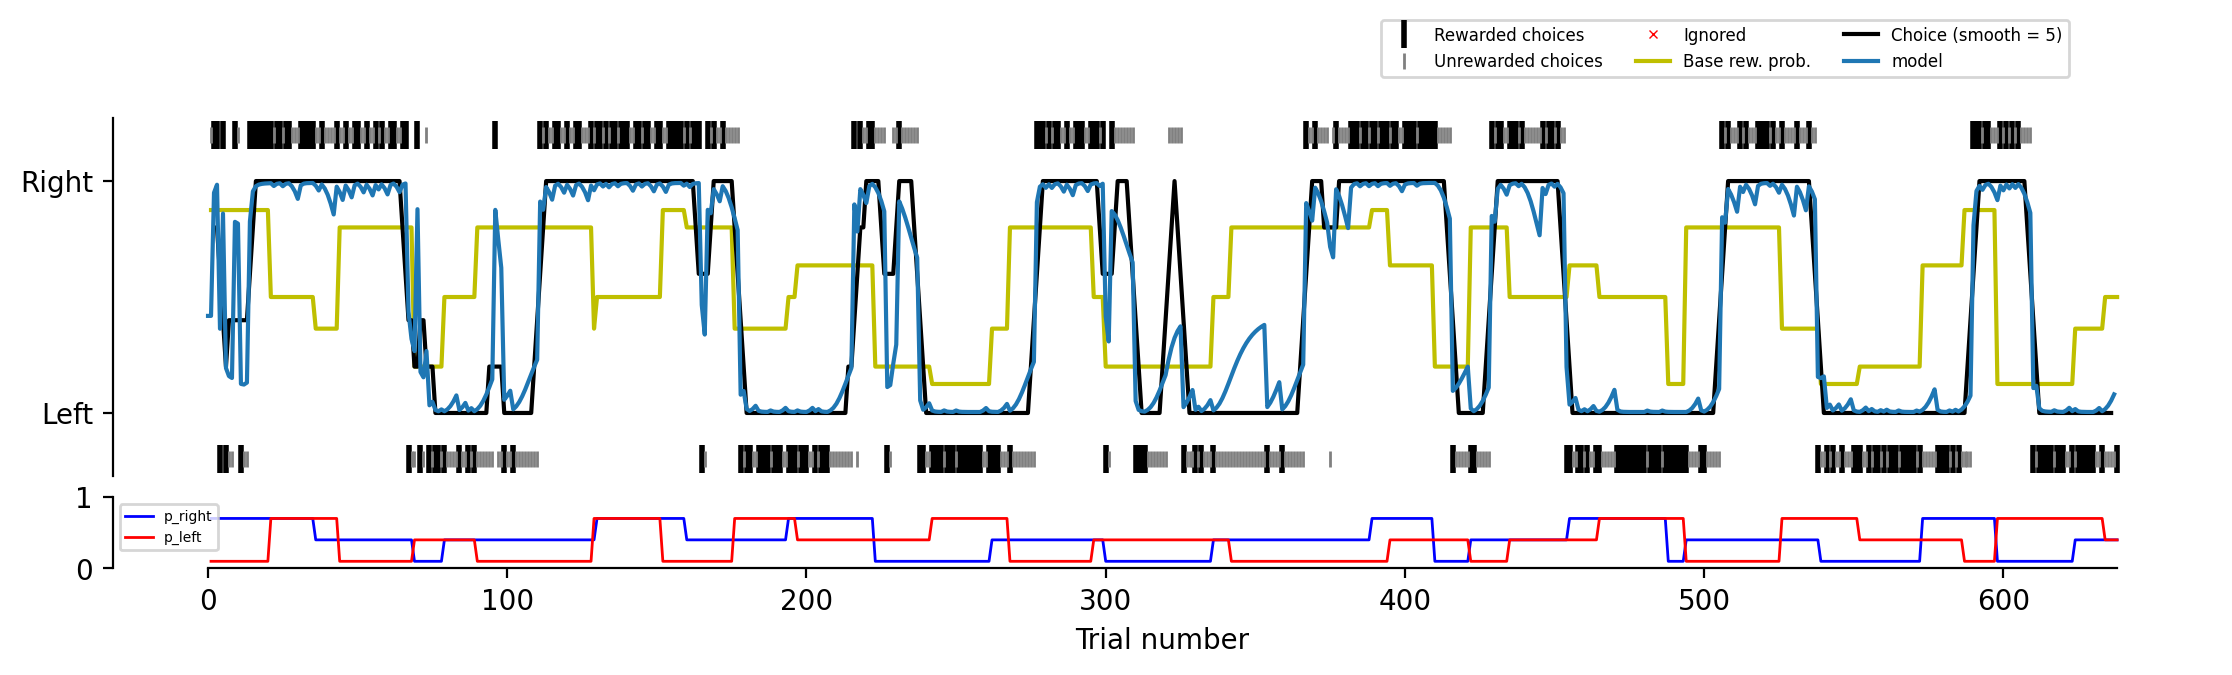

In [ ]:

from general_visualization import plot_behavior_session
from nwb_utils import NWBUtils
from model_fitting import fit_q_learning_model

nwb_data = NWBUtils.read_ophys_or_behavior_nwb(
    session_name="776293_2025-02-14_15-19-17"
)
fitted_latent=fit_q_learning_model(nwb_data)

plot_behavior_session(nwb_data=nwb_data,
                    latent_name="right_choice_probability",
                fitted_latent = fitted_latent
    
    )


Found behavior NWB: /root/capsule/data/behavior_nwb/776293_2025-02-14_15-19-17.nwb
Successfully read behavior NWB from: /root/capsule/data/behavior_nwb/776293_2025-02-14_15-19-17.nwb
Plotting alias 'QLearning_L2F1_softmax' (latent: right_choice_probability)


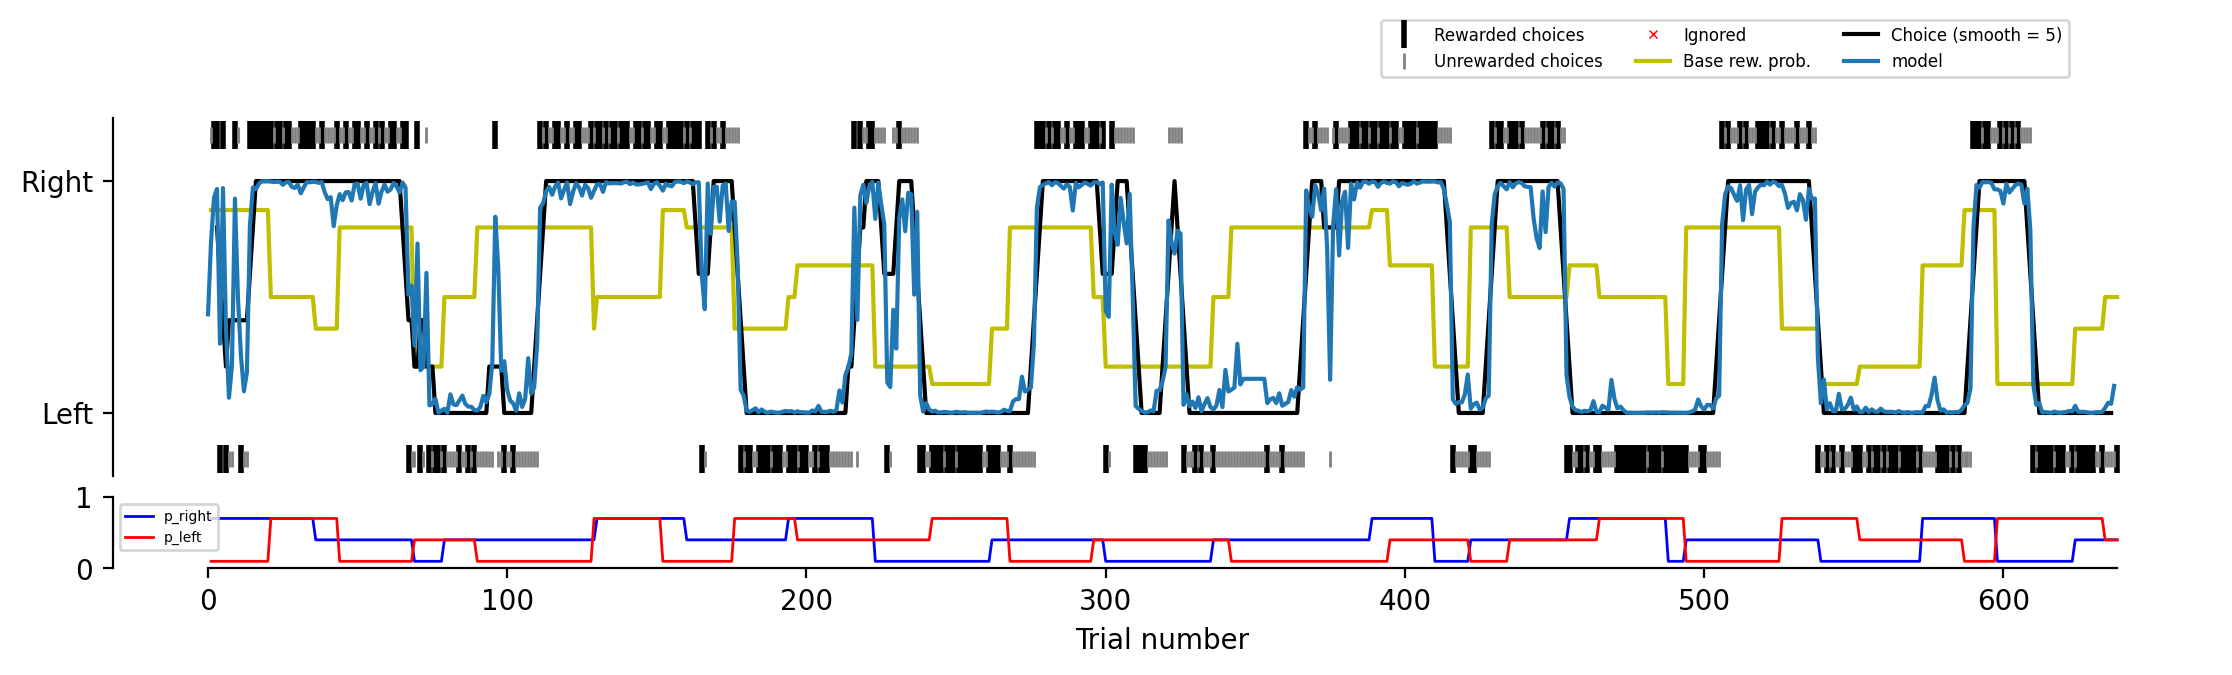

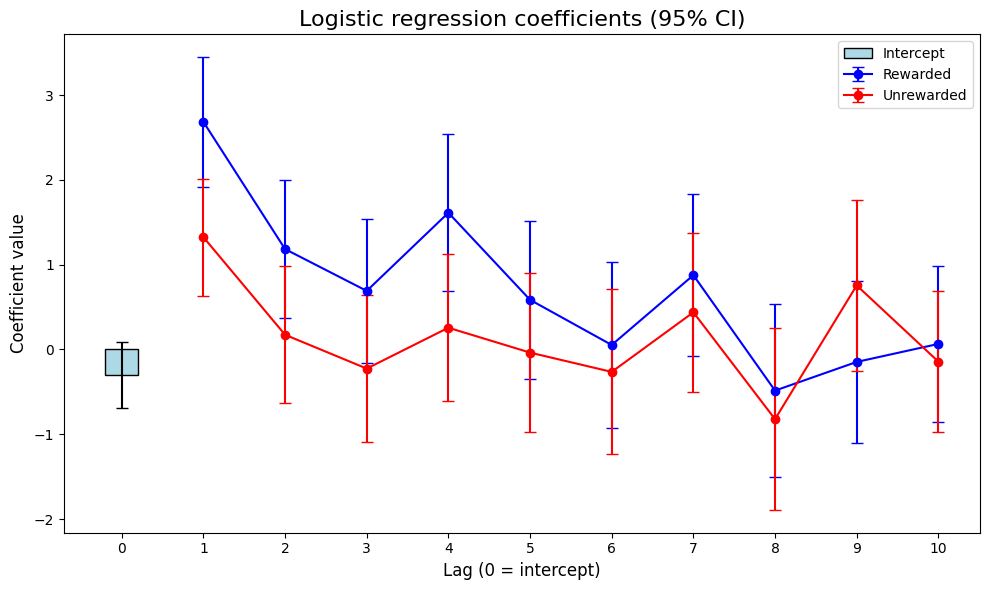

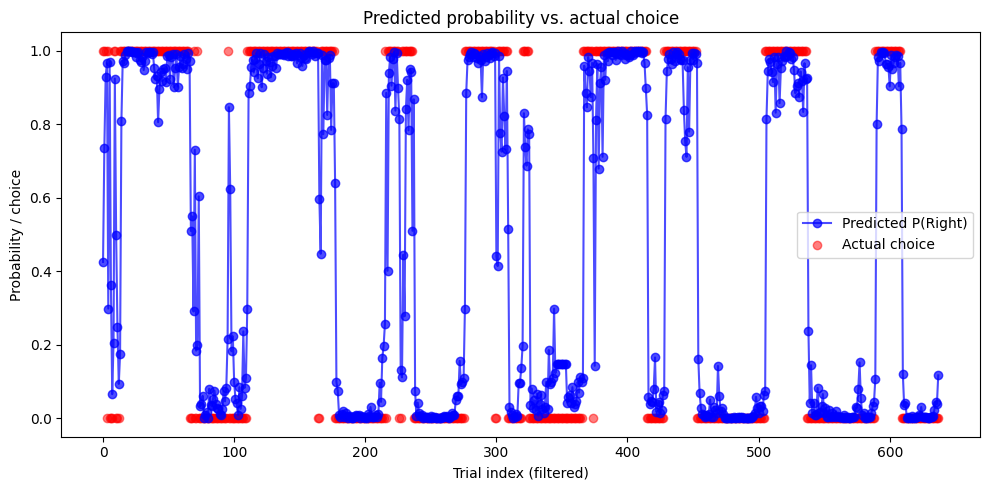

In [1]:

from general_visualization import plot_behavior_session
from nwb_utils import NWBUtils
from model_fitting import fit_choice_logistic_regression,visualize_choice_logistic_regression

nwb_data = NWBUtils.read_ophys_or_behavior_nwb(
    session_name="776293_2025-02-14_15-19-17"
)
fitted_result,fitted_latent=fit_choice_logistic_regression(nwb_data)

plot_behavior_session(nwb_data=nwb_data,
                    latent_name="right_choice_probability",
                fitted_latent = fitted_latent
    
    )
visualize_choice_logistic_regression(fitted_result)

In [ ]:
fitted_latent

{'fit_result': <statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x7f9f5a91d4b0>,
 'model_summary': '                           Logit Regression Results                           \n==============================================================================\nDep. Variable:                      y   No. Observations:                  628\nModel:                          Logit   Df Residuals:                      607\nMethod:                           MLE   Df Model:                           20\nDate:                Sun, 18 May 2025   Pseudo R-squ.:                  0.7826\nTime:                        02:30:00   Log-Likelihood:                -94.522\nconverged:                       True   LL-Null:                       -434.76\nCovariance Type:            nonrobust   LLR p-value:                2.987e-131\n==============================================================================\n                 coef    std err          z      P>|z|      [0.025      0.975]\n--------